In [162]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid')
sns.set_context('talk')
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
import plotly.express as px

# Data Loading

In [163]:
# Extract Dataset From Zip 
url = 'https://github.com/devtlv/Datasets-GEN-AI-Bootcamp/raw/refs/heads/main/Week%203/W3D4%20-%20Mini%20Project/Apple%20Stock%20Prices%20From%201981%20to%202023.zip'

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

In [164]:
# Load Data as Dataframe
df = pd.read_csv(r'C:\Repositories\DI-Bootcamp\Week14\Day1\MiniProject\data\Apple Stock Prices (1981 to 2023).csv')

# Quick Glance at Data
df.head()

Date      Open      High       Low     Close  Adj Close    Volume
0  02/01/1981  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1  05/01/1981  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
2  06/01/1981  0.144531  0.144531  0.143973  0.143973   0.112032  45158400
3  07/01/1981  0.138393  0.138393  0.137835  0.137835   0.107256  55686400
4  08/01/1981  0.135603  0.135603  0.135045  0.135045   0.105085  39827200

# Data Exploration

In [165]:
# Check for Duplicates
print("Number of Duplicates:", df.duplicated().sum())


Number of Duplicates: 0


In [166]:
# Check for Nulls
print(df.isna().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [167]:
# More Detailed Look at Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB


In [168]:
# Convert Date Column to Datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Check
df['Date']

0       1981-01-02
1       1981-01-05
2       1981-01-06
3       1981-01-07
4       1981-01-08
           ...    
10603   2023-01-23
10604   2023-01-24
10605   2023-01-25
10606   2023-01-26
10607   2023-01-27
Name: Date, Length: 10608, dtype: datetime64[ns]

# Data Visualization

In [169]:
# Timeseries of Stock Values
fig = px.line(df, x='Date', y=['Open', 'High', 'Low', 'Close', 'Adj Close'],
              title='Stock Trend Analysis Over Time', width=1000, height=500)
fig.show()

In [170]:
# Timeseries of Trading Volume
fig = px.line(df, x='Date', y='Volume',
              title='Trading Volume Analysis Over Time', width=1000, height=500)
fig.show()

In [171]:
# Candlestick Chart
import plotly.graph_objects as go

# Create the candlestick chart
fig = go.Figure(data=[
    go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name='AAPL'
    )
])

# Customize layout
fig.update_layout(
    title='Apple (AAPL) Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False,  # Hide range slider
    template='plotly_white'
)

fig.show()

# Statiscal Analysis

In [172]:
# Descriptive Statistics of Key Columns
df.select_dtypes(include='number').agg(['mean', 'median', 'std', 'min', 'max'])

Open        High         Low       Close   Adj Close  \
mean     16.689173   16.879955   16.500822   16.697362   16.027345   
median    0.488839    0.495536    0.480446    0.487701    0.404851   
std      35.450519   35.882848   35.031289   35.473912   35.154878   
min       0.049665    0.049665    0.049107    0.049107    0.038213   
max     182.630005  182.940002  179.119995  182.009995  180.959747   

              Volume  
mean    3.275098e+08  
median  2.145976e+08  
std     3.378203e+08  
min     0.000000e+00  
max     7.421641e+09

In [173]:
# Analyze closing prices with a moving average
df['MA30'] = df['Close'].rolling(window=30).mean() # Short-Term Moving Average (30 Days)
df['MA180'] = df['Close'].rolling(window=180).mean() # Long-Term Moving Average (180 Days)

# Plot 30-Day Rolling Average Time Series
fig = px.line(df, x='Date', y=['MA30', 'MA180', 'Close'],
              title='Stock Trend Analysis Over Time', width=1000, height=500)
fig.show()


# Hypothesis Testing

#### Execute a t-test to compare average closing prices across different years.

In [174]:
# Rather than Year, I'll Check by Decade
df_2000s = df[df['Date'].dt.year.isin([(2000 + i) for i in range(10)])] # Extract all values between 2000 - End of 2009
df_2010s = df[df['Date'].dt.year.isin([(2010 + i) for i in range(10)])] # Extract all Values between 2010 - End of 2019
df_2020s = df[df['Date'].dt.year.isin([2020, 2021, 2022, 2023])] # Extract all Values between 2020 - 2023

# Extract the Closing Prices for Each Decade
prices_2000 = df_2000s['Close']
prices_2010 = df_2010s['Close']
prices_2020 = df_2020s['Close']

In [175]:
import scipy.stats as stats

# Execute 2-Independent-Samples T-Test to Determine Significance
# Calculate T-Stat and P-Value
t_stat, p_value = stats.ttest_ind(prices_2000, prices_2010, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Determine Significance
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis. There is a significant difference between the average closing prices in the 2000's and 2010's")

T-statistic: -89.82427964542617, P-value: 0.0
Reject the Null Hypothesis. There is a significant difference between the average closing prices in the 2000's and 2010's


In [176]:
# Execute 2-Independent-Samples T-Test to Determine Significance (2010's and 2020's)
t_stat, p_value = stats.ttest_ind(prices_2000, prices_2010)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Determine Significance
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis. There is a significant difference between the average closing prices in the 2010's and 2020's")

T-statistic: -89.8071991578354, P-value: 0.0
Reject the Null Hypothesis. There is a significant difference between the average closing prices in the 2010's and 2020's


#### Examine daily returns’ distribution and test for normality using SciPy.

<Figure size 1000x600 with 0 Axes>

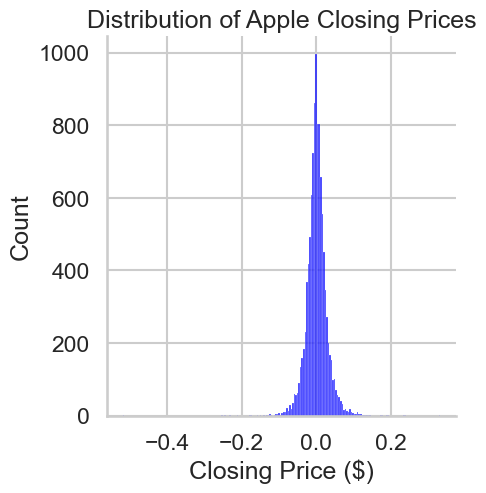

In [183]:
# Calculate Daily Returns (By Percentage)
df['Return'] = df['Close'].pct_change()

# Visualize Distribution
plt.figure(figsize=(10,6))
sns.displot(data=df, x='Return', color='blue')
plt.title("Distribution of Apple Closing Prices")
plt.xlabel("Closing Price ($)")
plt.show()

In [ ]:
from scipy.stats import normaltest
# Test for Normality
clean_return = df['Return'].dropna() # Drop Missing Values

# Use D’Agostino and Pearson’s Test due to Large Dataset
t_stat, p_value = normaltest(clean_return)
print(f"Statistic={t_stat:.3f}, p-value={p_value:.3f}")

# Conclusion - Null Hypothesis: Returns is Normally Distributed
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis. Returns are NOT normally distributed")
else:
    print("Accept the Null Hypothesis. Returns ARE normally distributed")

Statistic=2719.205, p-value=0.000
Reject the Null Hypothesis. Returns are NOT normally distributed


# Summary and Insights

- In this project, I loaded and analyzed the Apple Stock Data from 1981 to 2023

- I observed that for most of the 2010's, the actual closing price was above the moving average, indicating an upward trend (which we can see quite easily). However, since around 2022, the actual closing price has fluctuated above and below the moving average, indicating the stock is around a stable price, or that there has been increased volatility on the value of the stock.

- I tested and found that there is a statistically significant difference in the change of the average closing stock price for Apple across multiple time periods

- I also found that the daily return on stock value was NOT normally distributed